# WeatherPy
----
## Observable Trends
#### Latitude vs Temperature, humidity, Cloudiness and Wind Speed

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles.

The Latitude vs Temperature plot indicates the closer a city is to the Equator the higher the temperature. Whereas the closer the city is to either of the poles the lower the temperature in comparison to cities close to the Equator.

The Latitude vs Humidity plot indicates that a larger part of cities has a humidity of above 50%.

Latitude vs Cloudiness plot does not indicate any strong relationships.

Latitude vs Wind speed plot indicates that the majority of cities has a wind speed of between 0 to 8 kph.

---

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [105]:
# Import dependencies 
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import json

# Import API Key
from api_keys import weather_api_key

# Output File (CSV)
output_file = "WeatherPy_data_output/Cities.csv"

# Determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
LatitudeRange = (-90, 90)
LongitudeRange = (-180, 180)

## Generate Cities List

In [106]:
# List for holding Latitudes_Longitudes and Cities
Latitudes_Longitudes = []
Cities = []

# Create a set of random latitude and longitude combinations
Latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
Longitutes = np.random.uniform(low=-180.000, high=180.000, size=1500)
Latitudes_Longitudes = zip(Latitudes, Longitutes)

# Identify nearest city for each latitude/longitude combination
for Lat_Lng in Latitudes_Longitudes:
    City = citipy.nearest_city(Lat_Lng[0], Lat_Lng[1]).city_name
    
    # If the city is unique, add it to a the cities list
    if City not in Cities:
        Cities.append(City)

# Print the city count to confirm sufficient count
print("{} cities have been identified to poll for weather".format(len(Cities)))




609 cities have been identified to poll for weather


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [107]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key +"&q="

# Cities weather data frame
Cities_df = pd.DataFrame({"City":Cities})
Cities_df["Temperature(C)"] =""
Cities_df["Humidity(%)"] =""
Cities_df["Cloudiness(%)"] =""
Cities_df["Wind Speed (kph)"] =""
Cities_df["Latitude"]=""
Cities_df["Longitude"]=""
Cities_df.head()
print("Beginning Data Retrieval")
print("------------------------")

for index, row in Cities_df.iterrows():
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    
    try:
        Cities_df.loc[index,"Temperature(C)"]=city_weather['main']['temp']
        Cities_df.loc[index,"Humidity(%)"]=city_weather['main']['humidity']
        Cities_df.loc[index,"Cloudiness(%)"]=city_weather['clouds']['all']
        Cities_df.loc[index,"Wind Speed (kph)"]=city_weather['wind']['speed']
        Cities_df.loc[index,"Latitude"]=city_weather['coord']['lat']
        Cities_df.loc[index,"Longitude"]=city_weather["coord"]['lon']
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

print(Cities_df)

Beginning Data Retrieval
------------------------
Processing Record 0 | ushuaia
Processing Record 1 | vaini
Processing Record 2 | avarua
Processing Record 3 | hobart
Processing Record 4 | bay saint louis
Processing Record 5 | mar del plata
Processing Record 6 | viedma
Processing Record 7 | chuy
Processing Record 8 | los llanos de aridane
Processing Record 9 | yellowknife
Processing Record 10 | tabory
Processing Record 11 | cape town
Processing Record 12 | mataura
Processing Record 13 | houma
Processing Record 14 | thompson
Processing Record 15 | bluff
Processing Record 16 | saldanha
Processing Record 17 | hermanus
Processing Record 18 | taolanaro
City not found... skipping.
Processing Record 19 | kodiak
Processing Record 20 | tual
Processing Record 21 | formoso do araguaia
City not found... skipping.
Processing Record 22 | tasiilaq
Processing Record 23 | bredasdorp
Processing Record 24 | ipora
Processing Record 25 | jinchang
Processing Record 26 | kajaani
Processing Record 27 | teya
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [108]:
# Drop cities that return blanks
Cities_df.replace("", np.nan, inplace = True)
CitiesClean_df = Cities_df.dropna()

# Display  data frame
CitiesClean_df.head()


,City,Temperature(C),Humidity(%),Cloudiness(%),Wind Speed (kph),Latitude,Longitude
0,ushuaia,4.81,87.0,75.0,3.09,-54.8000,-68.3000
1,vaini,22.09,94.0,20.0,1.54,-21.2000,-175.2000
2,avarua,26.03,78.0,75.0,8.23,-21.2078,-159.7750
3,hobart,12.51,69.0,75.0,3.09,-42.8794,147.3294
4,bay saint louis,16.84,97.0,0.0,3.77,30.3088,-89.3300


In [109]:
# Print the total numerb of cities
print(f"There are {len(CitiesClean_df)} cities included in this weather analyses.")

# Save data frame as csv file
CitiesClean_df.to_csv('WeatherPy_Data_Output/CityDataOutput.csv')

There are 559 cities included in this weather analyses.


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [110]:
# Check if there are any cities with >100% humidity
CityCheck = CitiesClean_df["Humidity(%)"].describe(include = "all")

# Print number of Cities with >100% humidity
print("Upon inspection, the maximum humidity value is 100%, so there are no values greater than 100% in the data!")

# Display stats
CityCheck

Upon inspection, the maximum humidity value is 100%, so there are no values greater than 100% in the data!


count    559.000000
mean      68.026834
std       24.650191
min        1.000000
25%       55.000000
50%       75.000000
75%       87.000000
max      100.000000
Name: Humidity(%), dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

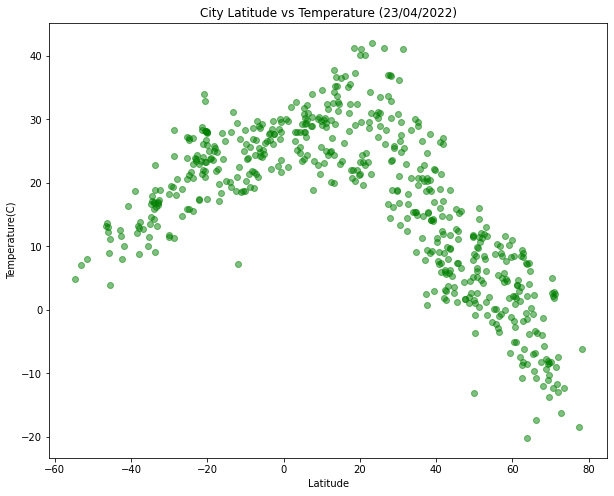

In [111]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Temperature'
plt.scatter(CitiesClean_df["Latitude"], CitiesClean_df["Temperature(C)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')
plt.title(f'City Latitude vs Temperature (23/04/2022)')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsTemperature.png")

# Display scatter plot 'City Latitude vs Termperature'
plt.show()

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles. 

The Latitude vs Temperature plot indicates the closer a city is to the Equator the higher the temperature. Whereas the closer the city is to either of the poles the lower the temperature in comparison to cities close to the Equator. 

## Latitude vs. Humidity Plot

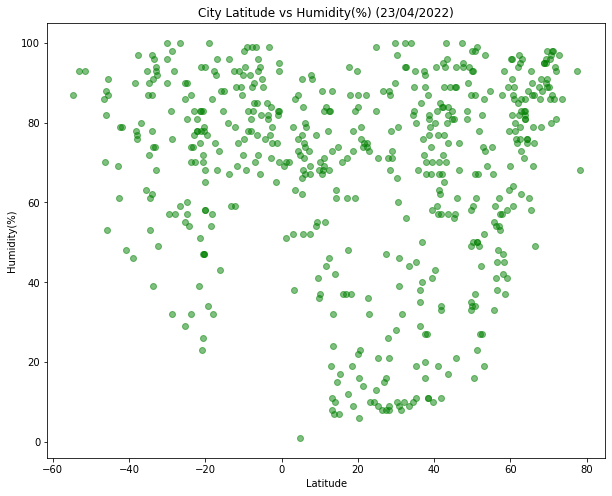

In [112]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Humidity(%)'
plt.scatter(CitiesClean_df["Latitude"], CitiesClean_df["Humidity(%)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'City Latitude vs Humidity(%) (23/04/2022)')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsHumidity.png")

# Display scatter plot 'City Latitude vs Humidity(%)'
plt.show()

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles. 

The Latitude vs Humidity plot indicates that a larger part of cities has a humidity of above 50%.

## Latitude vs. Cloudiness Plot

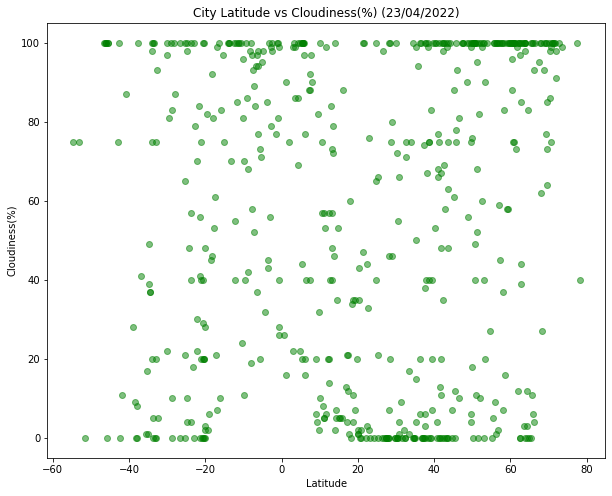

In [113]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Cloudiness(%)'
plt.scatter(CitiesClean_df["Latitude"], CitiesClean_df["Cloudiness(%)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f'City Latitude vs Cloudiness(%) (23/04/2022)')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsCloudiness.png")

# Display scatter plot 'City Latitude vs Cloudiness(%)'
plt.show()

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles.

Latitude vs Cloudiness plot does not indicate any strong relationships.

## Latitude vs. Wind Speed Plot

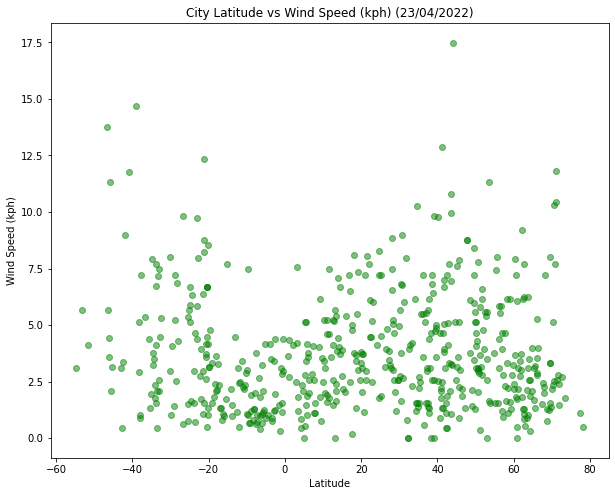

In [114]:
# Set graph size
plt.figure(figsize=(10,8))

# Create the scatter plot 'City Latitude vs Wind Speed (kph)'
plt.scatter(CitiesClean_df["Latitude"], CitiesClean_df["Wind Speed (kph)"], color='g', alpha=0.5)

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title(f'City Latitude vs Wind Speed (kph) (23/04/2022)')

# Save the scatter plot as png
plt.savefig("WeatherPy_Data_Output/LatitudeVsWindSpeed.png")

# Display scatter plot 'City Latitude vs Wind Speed (kph)'
plt.show()

Latitude specifies the north–south position of a point on the Earth's surface geographically. Latitude is an angle which ranges from 0° at the Equator to 90° at the poles.

Latitude vs Wind speed plot indicates that the majority of cities has a wind speed of between 0 to 8 kph.

## Linear Regression

In [179]:
# Create Northern and Southern Hemisphere DataFrames

# Create a subset of all the cities that are on or north of the equator for the Northern Hemisphere DataFrame
NorthernHemisphere = CitiesClean_df.loc[CitiesClean_df["Latitude"] >= 0]
print(f"There are {len(NorthernHemisphere)} cities in the northern hemisphere out of a total of {len(CitiesClean_df)}.")

# Create a subset of all the cities that are on or sorth of the equator for the Sorthern Hemisphere DataFrame
SouthernHemisphere = CitiesClean_df.loc[CitiesClean_df["Latitude"] <= 0]
print(f"There are {len(SouthernHemisphere)} cities in the southern hemisphere out of a total of {len(CitiesClean_df)}.")
    

There are 385 cities in the northern hemisphere out of a total of 559.
There are 174 cities in the southern hemisphere out of a total of 559.


In [168]:
# Define a function to plot linear regression
def plot_lr(x_axis, y_axis, x_label, y_label, label_pos, ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis, y_axis, color = "lightblue", edgecolor = "black")
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq, label_pos, fontsize=12, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"WeatherPy_Data_Output/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8672111741539825


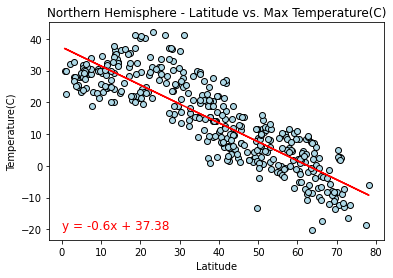

In [169]:
# Define variables for linear regression of northern hemisphere and create linear regression plot function plot_lr
x_label = "Latitude"
y_label = "Temperature(C)"
label_pos = (0,-20)
plt.title("Northern Hemisphere - Latitude vs. Max Temperature(C)")
plot_lr(NorthernHemisphere[x_label], NorthernHemisphere[y_label], x_label, y_label, label_pos, 5)

A strong relationship negative between latitude and maximum temperature can be observed in the Northern Hemisphere plot. The plot indicates as the latitide increases the maximum temperature (C) decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7385793935344533


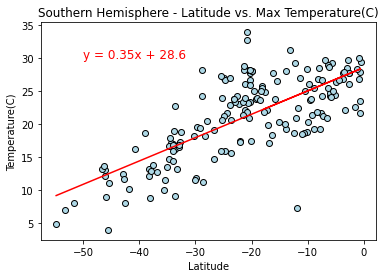

In [171]:
# Define variables for linear regression of southern hemisphere and create linear regression plot function plot_lr
x_label = "Latitude"
y_label = "Temperature(C)"
label_pos = (-50,30)
plt.title("Southern Hemisphere - Latitude vs. Max Temperature(C)")
plot_lr(SouthernHemisphere[x_label], SouthernHemisphere[y_label], x_label, y_label, label_pos, 6)

A strong positive relationship between latitude and maximum temperature can be observed in the Southern Hemisphere plot. The plot indicates as the latitide decreases the maximum temperature (C) increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.29101648966041765


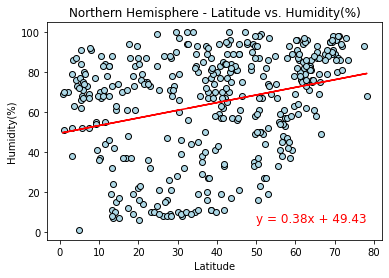

In [172]:
# Define variables for linear regression of northern hemisphere and create linear regression plot function plot_lr
x_label = "Latitude"
y_label = "Humidity(%)"
label_pos = (50,5)
plt.title("Northern Hemisphere - Latitude vs. Humidity(%)")
plot_lr(NorthernHemisphere[x_label], NorthernHemisphere[y_label], x_label, y_label, label_pos, 7)

For the Northern Hemisphere latitude vs humidity plot a weak positive relationship between latitude and humidity can be observed.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10798813024167786


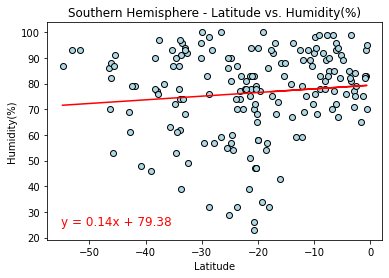

In [173]:
# Define variables for linear regression of southern hemisphere and create linear regression plot function plot_lr
x_label = "Latitude"
y_label = "Humidity(%)"
label_pos = (-55,25)
plt.title("Southern Hemisphere - Latitude vs. Humidity(%)")
plot_lr(SouthernHemisphere[x_label], SouthernHemisphere[y_label], x_label, y_label, label_pos, 8)

For the Southern Hemisphere latitude vs humidity plot a weak positive relationship between latitude and humidity can be observed.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26804726523208466


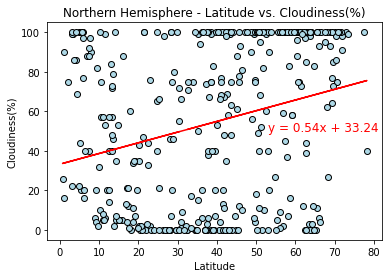

In [174]:
# Define variables for linear regression of northern hemisphere and create linear regression plot function plot_lr
x_label = "Latitude"
y_label = "Cloudiness(%)"
label_pos = (53,50)
plt.title("Northern Hemisphere - Latitude vs. Cloudiness(%)")
plot_lr(NorthernHemisphere[x_label], NorthernHemisphere[y_label], x_label, y_label, label_pos, 9)

For the Northern Hemisphere latitude vs cloudiness plot a positive relationship between latitude and humidity can be observed.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2100337678570754


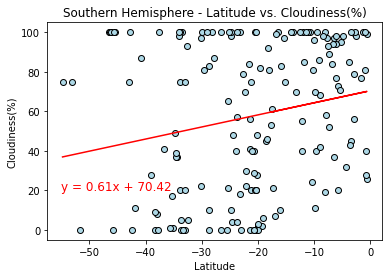

In [175]:
# Define variables for linear regression of southern hemisphere and create linear regression plot function plot_lr
x_label = "Latitude"
y_label = "Cloudiness(%)"
label_pos = (-55,20)
plt.title("Southern Hemisphere - Latitude vs. Cloudiness(%)")
plot_lr(SouthernHemisphere[x_label], SouthernHemisphere[y_label], x_label, y_label, label_pos, 10)

For the Southern Hemisphere latitude vs cloudiness plot a positive relationship between latitude and humidity can be observed.

####  Northern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression

The r-squared is: 0.006065427784898011


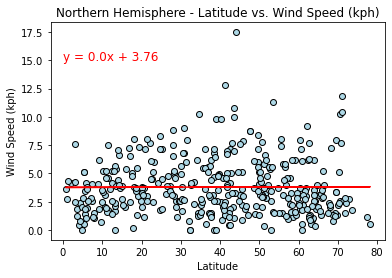

In [176]:
# Define variables for linear regression of northern hemisphere and create linear regression plot function plot_lr
x_label = "Latitude"
y_label = "Wind Speed (kph)"
label_pos = (0,15)
plt.title("Northern Hemisphere - Latitude vs. Wind Speed (kph)")
plot_lr(NorthernHemisphere[x_label], NorthernHemisphere[y_label], x_label, y_label, label_pos, 11)

For the Northern Hemisphere latitude vs wind speed plot a very weak positive relationship between latitude and wind speed can be observed. 

####  Southern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression

The r-squared is: -0.4056359735251992


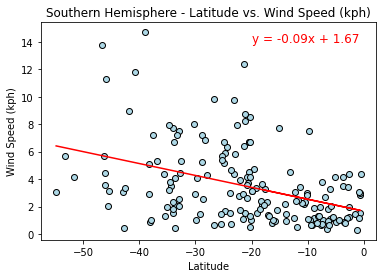

In [177]:
# Define variables for linear regression of southern hemisphere and create linear regression plot function plot_lr
x_label = "Latitude"
y_label = "Wind Speed (kph)"
label_pos = (-20,14)
plt.title("Southern Hemisphere - Latitude vs. Wind Speed (kph)")
plot_lr(SouthernHemisphere[x_label], SouthernHemisphere[y_label], x_label, y_label, label_pos, 12)

For the Southern Hemisphere latitude vs wind speed plot a negtaive relationship between latitude and wind speed can be observed.The closer the location of the city is to the Equator the more the wind speed decreases.